<a href="https://colab.research.google.com/github/diegodorado1729/Coding/blob/main/Python/CD-2024/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Nº4: Mitigación de ruido con PCA
---------------------------------------------
Santiago Ferreyra (LF), Diego Dorado (LF)

Ubicación en Git: [Tarea 4](https://github.com/diegodorado1729/Coding/blob/main/Python/CD-2024/Tarea4.ipynb)

In [60]:
# Ruta para guardar en git
# /Python/CD-2024/

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Parte 1: Digits dataset


### a) Considerar el dataset Digits provisto por scikit-learn. Determinar el número de features, samples y classes y el tamaño en píxeles de las imágenes.



In [62]:
from sklearn.datasets import load_digits

digits = load_digits()       # type(digits) >>  <class 'sklearn.utils._bunch.Bunch'>
target_names = digits.target_names

n_features = len(digits.feature_names)
n_samples = len(digits.images)
n_clases = len(digits.target_names)
tam_imagenes = np.shape(digits.images)[-2:]

print()
print("features",n_features)
print("samples",n_samples)
print("classes", n_clases)
print("tam imagenes", tam_imagenes)


features 64
samples 1797
classes 10
tam imagenes (8, 8)


### b) Separar un conjunto de entrenamiento reservando un 25 % de los datos para test. Estratificar los conjuntos usando la clase y usar la semilla 42. A continuación normalizar los datos.


In [63]:
# Separar las características (X) y las etiquetas (y)
X = digits.data
y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verificar las formas de los conjuntos
print("Forma de X_train_normalized:", X_train_normalized.shape)
print("Forma de X_test_normalized:", X_test_normalized.shape)

Forma de X_train_normalized: (1347, 64)
Forma de X_test_normalized: (450, 64)


In [64]:
X_train = X_train_normalized
X_test = X_test_normalized

### c) Graficar las primeras 10 imagenes, respetando el factor de forma original. ¿Cuál es?

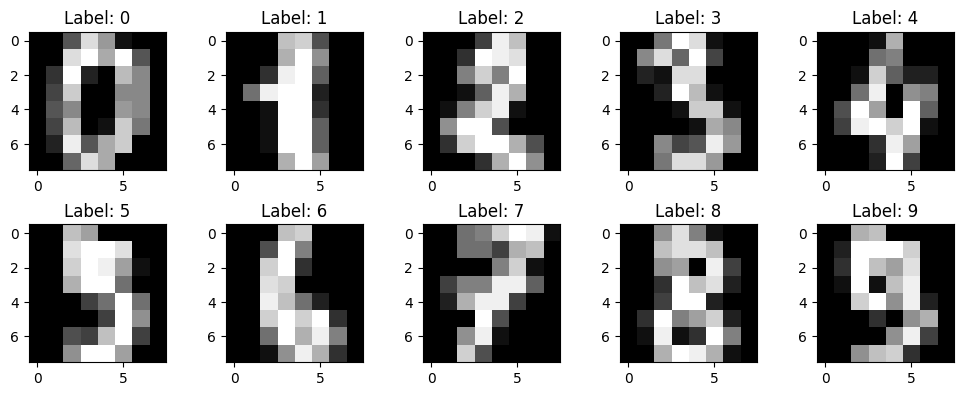

In [65]:
# Graficar las primeras 10 imágenes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for ax, image, label in zip(axes.flat, X[:10], y[:10]):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {label}')

plt.tight_layout()
plt.show()

El tamaño de la figura se ajusta para respetar el factor de forma original de las imágenes (8x8 píxeles).

## Parte 2: Hyperparameter Tunning of k-nearest Neighbors


### d) Implementar una búsqueda del valor óptimo de vecinos cercanos para KNeighborsClassifier, usando el modelo GridSearchCV, ambos de scikit-learn. Usar los valores default de los parámetros de KNeighborsClassifier, ¿qué métrica de distancia se usa? Realizar la búsqueda con k ∈ {2, 3, 4, 5, 6, 7, 8, 9, 10}, usando 10-fold cross-validation. ¿De qué tamaño resultan los conjuntos de validación?


In [66]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Definir los parámetros a buscar
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Definir el GridSearchCV con 10-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=10)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los resultados
print("Mejor valor de k encontrado:", grid_search.best_params_['n_neighbors'])
print("Exactitud del mejor modelo en conjunto de prueba:", grid_search.best_score_)

Mejor valor de k encontrado: 5
Exactitud del mejor modelo en conjunto de prueba: 0.9791984521835267


Según la documentación del [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), el valor default para la métrica es **'minkowski'**

Por otro lado, para realizar la cross validation usamos 10 folds. Cuando el modelo es entrenado, sólo se usan $k-1$ de los folds como data de entrenamiento. Por lo tanto tendremos **9 conjuntos de validación**


### e) Reportar el mejor valor de k hallado y el correspondiente mean test score. Graficar accuracy en función de k ∈ {2, 3, 4, 5, 6, 7, 8, 9, 10}.


Mejor valor de k encontrado: 5
Mean test score correspondiente: 0.9791984521835267


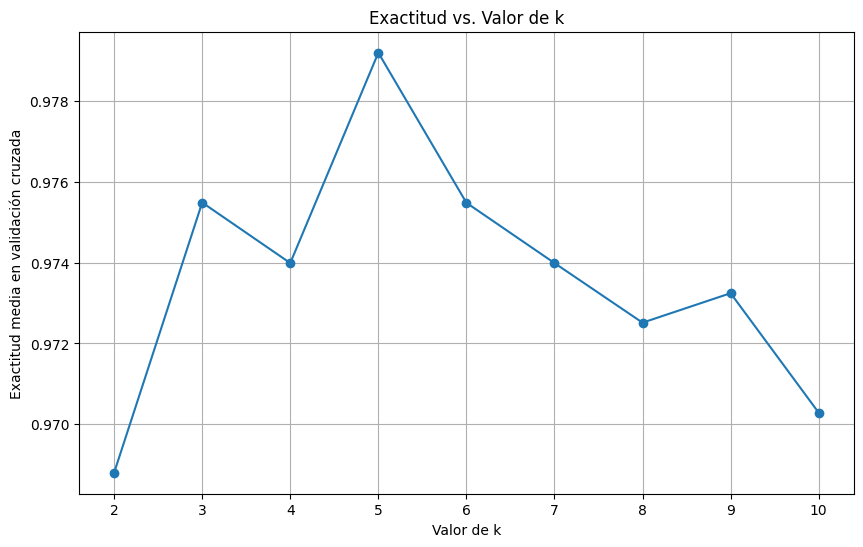

In [67]:
# Obtener los resultados de GridSearchCV
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_test_scores = results['mean_test_score']

# Encontrar el índice del mejor valor de k
best_k_idx = np.argmax(mean_test_scores)
best_k = k_values[best_k_idx]
best_score = mean_test_scores[best_k_idx]

# Reportar el mejor valor de k y el mean test score correspondiente
print("Mejor valor de k encontrado:", best_k)
print("Mean test score correspondiente:", best_score)

# Graficar accuracy en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title("Exactitud vs. Valor de k")
plt.xlabel("Valor de k")
plt.ylabel("Exactitud media en validación cruzada")
plt.xticks(k_values)
plt.grid(True)
plt.show()


### f) Evaluar KNeighborsClassifier con valor de k óptimo sobre el set de test. Reportar la salida de classification report y mostrar la matriz de confusión. ¿Qué dígitos se confunden con cuales otros? ¿Condice la accuracy sobre el set de test con la mejor encontrada en la búsqueda en grilla? ¿Puede decirse que el modelo sufre de overfitting? Explicar.

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.96      1.00      0.98        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450

Matriz Confusión:



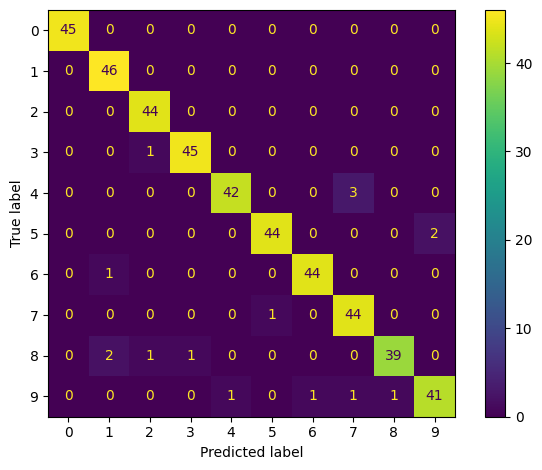

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Crear un nuevo modelo KNeighborsClassifier con el mejor valor de k encontrado
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Entrenar el modelo con los datos de entrenamiento completos (X_train, y_train)
best_knn_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Mostrar el classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
cr_KNC = classification_report(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz Confusión:\n")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=target_names)
plt.tight_layout()
plt.show()


Observando la matriz de confusion podemos ver cuales son los digitos que se confunden con otros, en este caso observamos que en tres ocasiones el digito 4 es confundido con el 7, el digito 5 es confundido dos veces por el 9, y el digito 2 es confundido por el 8 tambien en dos ocasiones.
La accuracy sobre el set de test fue de 0.96, mientras que la mejor encontrada en la busqueda en grilla fue de 0.97. Esto puede deberse a la variabilidad de los datos de prueba y a como se dviden los conjuntos de entrenamiento y prueba.
Sin embargo, notamos que ambos valores son muy cercanos, siendo menor el valor obtenido sobre el set test, por lo tanto esta clasificando sin llegar a sufrir overfitting.

## Parte 3: PCA



### g) Calcular PCA con 30 componentes sobre el conjunto de entrenamiento. Graficar la varianza explicada acumulada en función del número de componentes. Verificar en el gráfico que el 70 % de la varianza acumulada se explica con aproximadamente sólo 14 componentes.


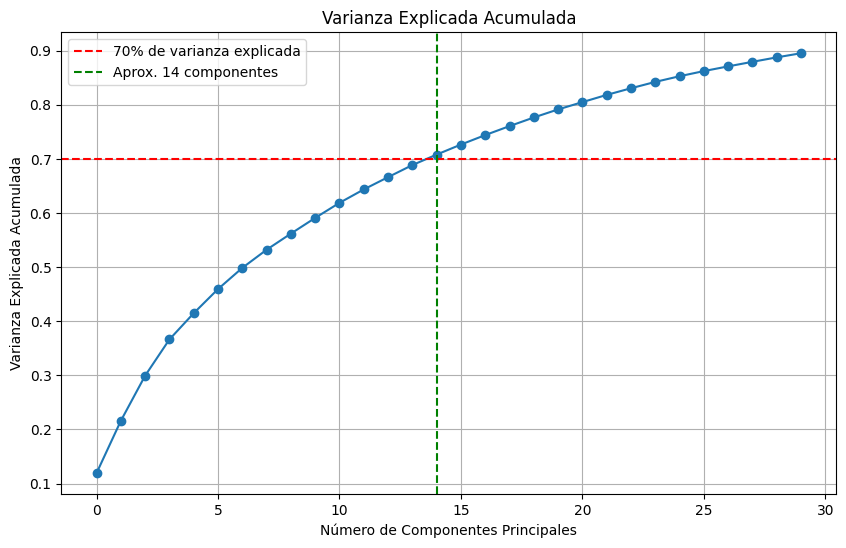

In [69]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Calcular PCA con 30 componentes sobre el conjunto de entrenamiento
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)

# Obtener la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(0, 30), cumulative_variance_ratio, marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.axhline(y=0.7, color='r', linestyle='--', label='70% de varianza explicada')
plt.axvline(x=np.where(cumulative_variance_ratio >= 0.7)[0][0], color='g', linestyle='--', label='Aprox. 14 componentes')
plt.legend()
plt.grid(True)
plt.show()


### h) Reconstruir los dígitos con 14 componentes de PCA y graficar en dos filas los 10 primeros dígitos originales (normalizados) de entrenamiento y los correspondientes reconstruidos para comparar las imágenes.


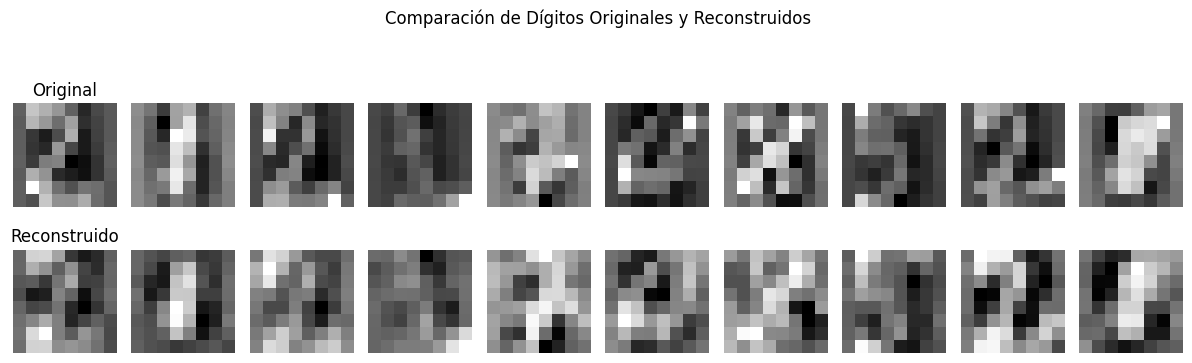

In [70]:
# Re-entrenar PCA con 14 componentes
pca_14 = PCA(n_components=14)
X_train_pca_14 = pca_14.fit_transform(X_train)

# Reconstruir los dígitos con 14 componentes
X_train_reconstructed = pca_14.inverse_transform(X_train_pca_14)

# Graficar los dígitos originales y los reconstruidos
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))

# Graficar los 10 primeros dígitos originales
for i, ax in enumerate(axes[0]):
    ax.imshow(X_train_normalized[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

# Graficar los 10 primeros dígitos reconstruidos
for i, ax in enumerate(axes[1]):
    ax.imshow(X_train_reconstructed[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstruido")

plt.suptitle("Comparación de Dígitos Originales y Reconstruidos")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### i) Entrenar y evaluar KNeighborsClassifier con valor de k óptimo, usando los sets transformados con PCA de 14 componentes. Evaluar el modelo usando las métricas del ítem (f) y comparar los resultados de ambos ítems. Expresar una conclusión.

In [71]:
from sklearn.metrics import classification_report

# Entrenar el modelo KNeighborsClassifier con el valor de k óptimo
best_knn_model_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model_pca.fit(X_train_pca_14, y_train)

# Transformar el conjunto de prueba utilizando PCA de 14 componentes
X_test_pca_14 = pca_14.transform(X_test)

# Predecir las etiquetas del conjunto de prueba
y_pred_pca_14 = best_knn_model_pca.predict(X_test_pca_14)

# Calcular métricas de evaluación
print("Classification report para los sets tranformados con PCA de 14 componentes :\n")
print(classification_report(y_test, y_pred_pca_14))

# Mostrar el classification report
print("Classification Report al evaluar en KNeighborsClassifier:\n")
print(cr_KNC)

Classification report para los sets tranformados con PCA de 14 componentes :

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.90      0.98      0.94        46
           2       0.93      0.98      0.96        44
           3       0.96      0.98      0.97        46
           4       1.00      0.96      0.98        45
           5       0.96      0.96      0.96        46
           6       0.98      0.98      0.98        45
           7       0.91      0.96      0.93        45
           8       0.97      0.88      0.93        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

Classification Report al evaluar en KNeighborsClassifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

Podemos notar que todas las métricas tanto de las obtenidas con PCA como con Kneighbors, en promedio, tienen valores similares. Podemos concluir entonces que la reducción de dimensionalidad usando PCA no ha afectado negativamente el modelo. Por lo tanto, es conveniente usar PCA en este caso para manejar menos variables y que el entrenamiento sea más eficiente.

## Parte 4: Datos con ruido



### j) Ofuscar las imágenes agregando ruido usando: np.random.normal(digits.data,2). Explicar en qué consiste esta transformación de los píxeles. ¿Qué tipo de ruido se agregó a las imágenes?


In [73]:
np.random.seed(42)
Xnoisy = np.random.normal(X, 2)

X_train, X_test, y_train, y_test = train_test_split(
    Xnoisy, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Aquí lo que se hace es almacenar en X_noisy una matriz de números aleatorios generados a partir de una distribución normal centrada en los valores de X y una dispersión dada por una desviación estándar de 4. esto es, el tipo de ruido que se agrega a las imágenes es ruido gaussiano.


### k) Reproducir los tres ítems de la parte 3. Verificar en el gráfico ídem a (g) que 26 componentes explican el 75 % de la varianza acumulada.


In [74]:
# Normalizar los datos
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train)
X_test_r = scaler.transform(X_test)

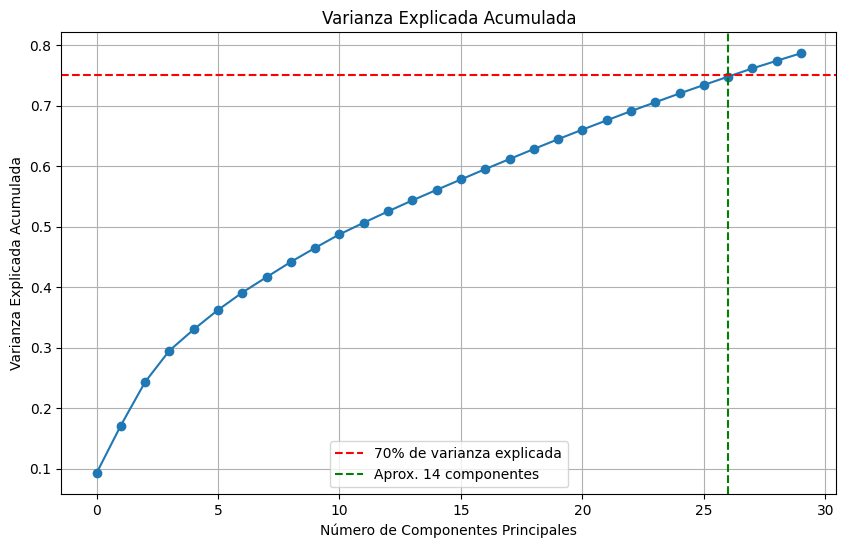

In [75]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Calcular PCA con 30 componentes sobre el conjunto de entrenamiento
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_r)

# Obtener la varianza explicada acumulada
explained_variance_ratio_r = pca.explained_variance_ratio_
cumulative_variance_ratio_r = np.cumsum(explained_variance_ratio_r)

# Graficar la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(0, 30), cumulative_variance_ratio_r, marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.axhline(y=0.75, color='r', linestyle='--', label='70% de varianza explicada')
plt.axvline(x=np.where(cumulative_variance_ratio_r >= 0.74)[0][0], color='g', linestyle='--', label='Aprox. 14 componentes')
plt.legend()
plt.grid(True)
plt.show()

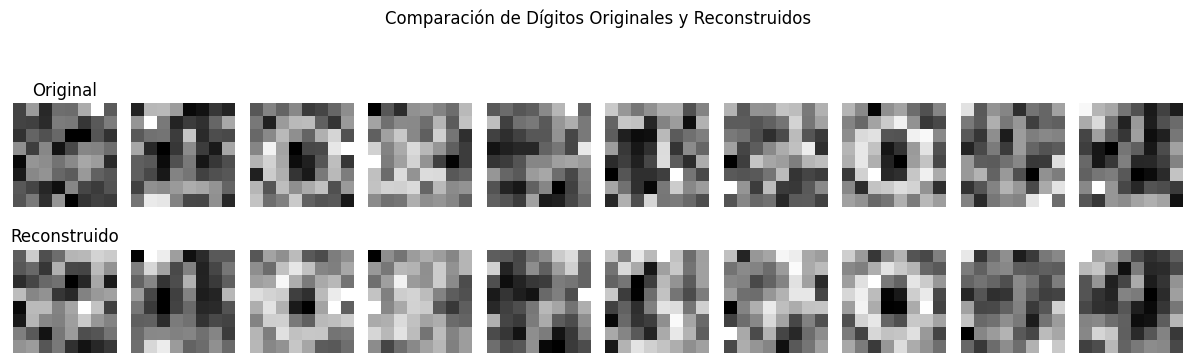

In [76]:
# Re-entrenar PCA con 26 componentes
pca_26 = PCA(n_components=26)
X_train_pca_26 = pca_26.fit_transform(X_train_r)

# Reconstruir los dígitos con 14 componentes
X_train_reconstructed = pca_26.inverse_transform(X_train_pca_26)

# Graficar los dígitos originales y los reconstruidos
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))

# Graficar los 10 primeros dígitos originales
for i, ax in enumerate(axes[0]):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

# Graficar los 10 primeros dígitos reconstruidos
for i, ax in enumerate(axes[1]):
    ax.imshow(X_train_reconstructed[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstruido")

plt.suptitle("Comparación de Dígitos Originales y Reconstruidos")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [77]:
from sklearn.metrics import classification_report

# Entrenar el modelo KNeighborsClassifier con el valor de k óptimo
best_knn_model_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model_pca.fit(X_train_pca_26, y_train)

# Transformar el conjunto de prueba utilizando PCA de 26 componentes
X_test_pca_26 = pca_26.transform(X_test)

# Predecir las etiquetas del conjunto de prueba
y_pred_pca_26 = best_knn_model_pca.predict(X_test_pca_26)

# Calcular métricas de evaluación
print(classification_report(y_test, y_pred_pca_26))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      1.00      0.95        37
           2       1.00      0.92      0.96        38
           3       0.89      0.89      0.89        46
           4       0.98      1.00      0.99        55
           5       0.91      0.90      0.91        59
           6       1.00      0.98      0.99        45
           7       0.95      0.98      0.96        41
           8       0.73      0.84      0.78        38
           9       0.93      0.79      0.85        48

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450




### l) Discutir cuál es el efecto y la utilidad de usar PCA sobre datos afectados por ruido.

Al comparar los resultados con obtenidos por el clasificador aplicado a las imagenes con y sin ruido, notamos que ambos obtienen niveles de accuracy similares . Por lo tanto podemos decir que al ultilizar PCA, el modelo es capaz de seguir calsificando correctamente a pesar de la presencia del ruido.
Una de las utilidades de utilizar PCA sobre los datos afectados con ruido es reduce la dimensionalidad de los datos originales conservando la mayor cantidad de informaion posible, reduciendo asi el costo computacional y merjorando la eficiencia en el procesamiento de los datos.